In [1]:
from google.colab import drive,files
drive.mount("/content/drive/")
path = "/content/drive/My Drive/Adult-Nonadult/"
train = path  + "train"
test = path +"test"
test1 = path + "holdout"


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
from PIL import Image,ImageDraw

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#

from tensorflow.keras.preprocessing.image import ImageDataGenerator
seed = 1234
np.random.seed(seed)

train_datagen = ImageDataGenerator(
    rescale=1./255, featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
train_dir = train
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(500, 375), batch_size = 25, class_mode = 'binary')

i=0
x_train = np.array([])
y_train = np.array([])

for data_batch, Labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    if i==0:
      x_train = data_batch
      y_train = Labels_batch
    else:
      x_train = np.vstack((x_train, data_batch))
      y_train = np.append(y_train, Labels_batch)
    i=i+1
    if(i>10):
      break

print(np.shape(x_train))
print(np.shape(y_train))

Found 140 images belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


data batch shape: (25, 500, 375, 3)
data batch shape: (25, 500, 375, 3)
data batch shape: (25, 500, 375, 3)
data batch shape: (25, 500, 375, 3)
data batch shape: (25, 500, 375, 3)
data batch shape: (15, 500, 375, 3)
data batch shape: (25, 500, 375, 3)
data batch shape: (25, 500, 375, 3)
data batch shape: (25, 500, 375, 3)
data batch shape: (25, 500, 375, 3)
data batch shape: (25, 500, 375, 3)
(265, 500, 375, 3)
(265,)


1.0


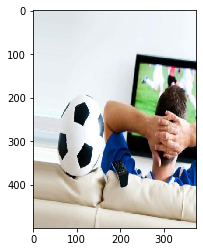

In [18]:
from keras.preprocessing import image
plt.imshow(image.array_to_img(x_train[10]))
print(y_train[10])

In [21]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validationdir = test
validation_generator = train_datagen.flow_from_directory(validationdir, target_size=(500, 375), batch_size = 25, class_mode = 'binary')

i=0
x_validation = np.array([])
y_validation = np.array([])

for data_batch, Labels_batch in validation_generator:
    print('data batch shape:', data_batch.shape)
    if i==0:
      x_validation = data_batch
      y_validation = Labels_batch
    else:
      x_validation = np.vstack((x_validation, data_batch))
      y_validation = np.append(y_validation, Labels_batch)
    i=i+1
    if(i>10):
      break

print(np.shape(x_validation))
print(np.shape(y_validation))

Found 59 images belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


data batch shape: (25, 500, 375, 3)
data batch shape: (25, 500, 375, 3)
data batch shape: (9, 500, 375, 3)
data batch shape: (25, 500, 375, 3)
data batch shape: (25, 500, 375, 3)
data batch shape: (9, 500, 375, 3)
data batch shape: (25, 500, 375, 3)
data batch shape: (25, 500, 375, 3)
data batch shape: (9, 500, 375, 3)
data batch shape: (25, 500, 375, 3)
data batch shape: (25, 500, 375, 3)
(227, 500, 375, 3)
(227,)


0.0


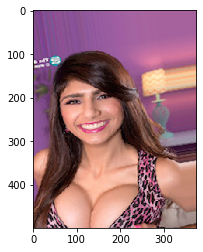

In [14]:
from keras.preprocessing import image
plt.imshow(image.array_to_img(x_validation[10]))
print(y_validation[10])


In [15]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (500, 375, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 498, 373, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 249, 186, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 247, 184, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 123, 92, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 121, 90, 128)      73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 60, 45, 128)       0         
_________________________________________

In [0]:
from tensorflow.keras import optimizers
model.compile(loss = 'binary_crossentropy',
optimizer = optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [24]:
history = model.fit_generator(
train_generator, 
steps_per_epoch = 100,
epochs = 2,
validation_data = validation_generator,
validation_steps = 40)  

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/2


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


100/100 [==============================] - 162s 2s/step - loss: 0.2766 - acc: 0.8897 - val_loss: 0.5280 - val_acc: 0.8106
Epoch 2/2
100/100 [==============================] - 160s 2s/step - loss: 0.2337 - acc: 0.9022 - val_loss: 0.5169 - val_acc: 0.8068


In [62]:
test_datagen = ImageDataGenerator(rescale=1./255)
testdir = test1
test_generator = train_datagen.flow_from_directory(testdir, target_size=(500, 375), batch_size = 25, class_mode = 'binary')

i=0
x_test = np.array([])
y_test = np.array([])

for data_batch, Labels_batch in test_generator:
    print('data batch shape:', data_batch.shape)
    if i==0:
      x_test = data_batch
      y_test = Labels_batch
    else:
      x_test = np.vstack((x_test, data_batch))
      y_test = np.append(y_test, Labels_batch)
    i=i+1
    if(i>10):
      break

print(np.shape(x_test))
print(np.shape(y_test))

Found 21 images belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


data batch shape: (21, 500, 375, 3)
data batch shape: (21, 500, 375, 3)
data batch shape: (21, 500, 375, 3)
data batch shape: (21, 500, 375, 3)
data batch shape: (21, 500, 375, 3)
data batch shape: (21, 500, 375, 3)
data batch shape: (21, 500, 375, 3)
data batch shape: (21, 500, 375, 3)
data batch shape: (21, 500, 375, 3)
data batch shape: (21, 500, 375, 3)
data batch shape: (21, 500, 375, 3)
(231, 500, 375, 3)
(231,)


In [100]:
y_test

array([0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 1., 1.

In [0]:
predictions = model.predict(x_test)

In [0]:
y_pred =np.where(predictions>0.3, 1, 0)

In [128]:
y_pred = y_pred[:,0]
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [0]:
import sklearn.metrics as metrics
matrix = metrics.confusion_matrix(y_test, y_pred)

In [130]:
matrix

array([[110,   0],
       [ 49,  72]])

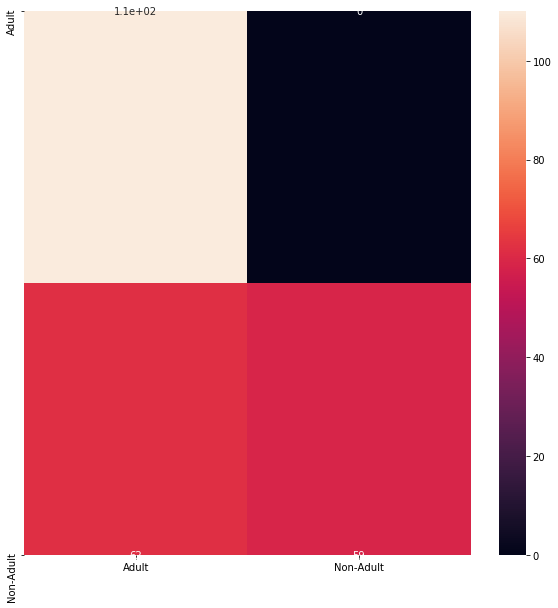

In [106]:
import pandas as pd
import seaborn as sn
df_cm = pd.DataFrame(matrix, index = ['Adult','Non-Adult'],
                  columns = ['Adult','Non-Adult'])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True)

<function matplotlib.pyplot.show>

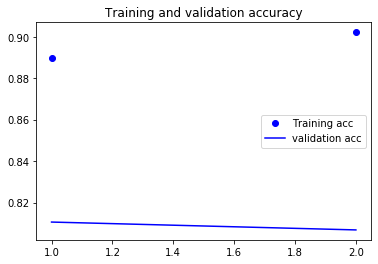

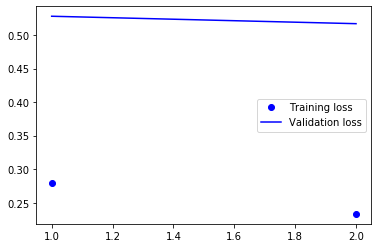

In [40]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc,'bo', label='Training acc')
plt.plot(epochs, val_acc,'b', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()
plt.show